In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('diabetes_data_upload.csv')

In [7]:
data.info

<bound method DataFrame.info of      Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush 

In [8]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [9]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


[Text(0, 0, '328'), Text(0, 0, '192')]

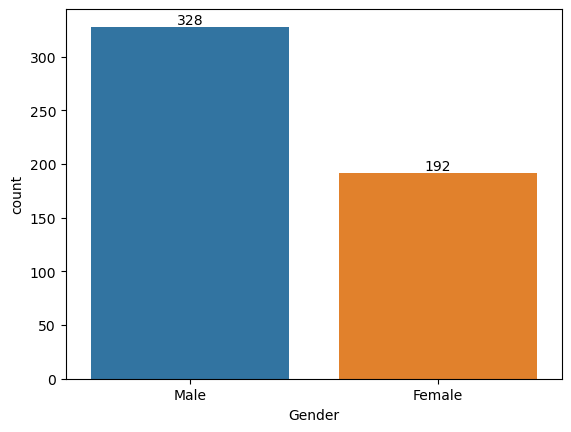

In [11]:
plot = sns.countplot(data = data, x='Gender')
plot.bar_label(plot.containers[0])

In [12]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [13]:
data['Age'].mean()

48.02884615384615

In [14]:
have_ployuria=(data['Polyuria']=='Yes').sum()/data.shape[0] *100
have_Obesity=(data['Obesity']=='Yes').sum()/data.shape[0] *100
have_Itching=(data['Itching']=='Yes').sum()/data.shape[0] *100
have_weakness=(data['weakness']=='Yes').sum()/data.shape[0] *100
have_Polydipsia=(data['Polydipsia']=='Yes').sum()/data.shape[0] *100
have_Alopecia=(data['Alopecia']=='Yes').sum()/data.shape[0] *100
have_Irritability=(data['Irritability']=='Yes').sum()/data.shape[0] *100
have_suddenweightloss=(data['sudden weight loss']=='Yes').sum()/data.shape[0] *100

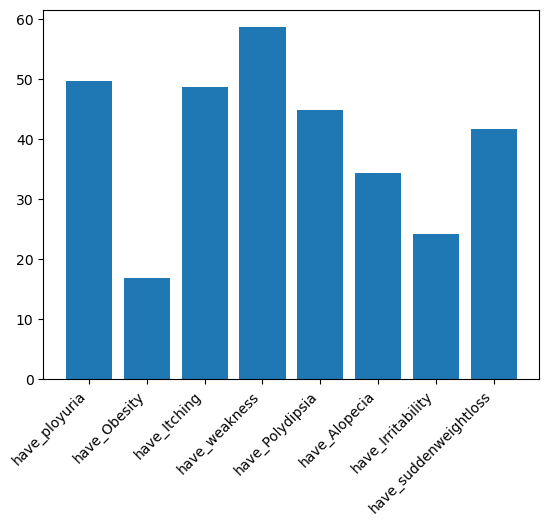

In [15]:
common_symtoms= {u'have_ployuria':have_ployuria,u'have_Obesity':have_Obesity,u'have_Itching':have_Itching,u'have_weakness':have_weakness,u'have_Polydipsia':have_Polydipsia,u'have_Alopecia':have_Alopecia,u'have_Irritability':have_Irritability,u'have_suddenweightloss':have_suddenweightloss}
plt.bar(range(len(common_symtoms)), list(common_symtoms.values()), align='center')
plt.xticks(range(len(common_symtoms)), list(common_symtoms.keys()))
plt.xticks(rotation=45, ha='right')
plt.show()

[Text(0, 0, '320'), Text(0, 0, '200')]

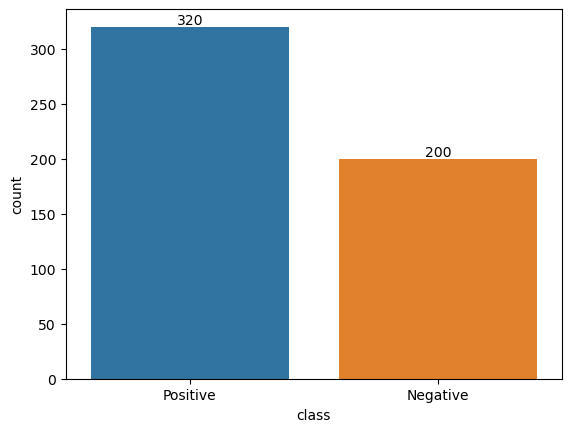

In [16]:
plot =sns.countplot(data=data, x='class')
plot.bar_label(plot.containers[0])

In [17]:
df_numeric = data.copy()
encoder = lambda x: 1 if x.lower() in ('positive', 'yes') else 0
for feature in df_numeric.columns: 
    if df_numeric[feature].dtype == 'object':
        df_numeric[feature] = df_numeric[feature].apply(encoder)

In [18]:
df_numeric.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

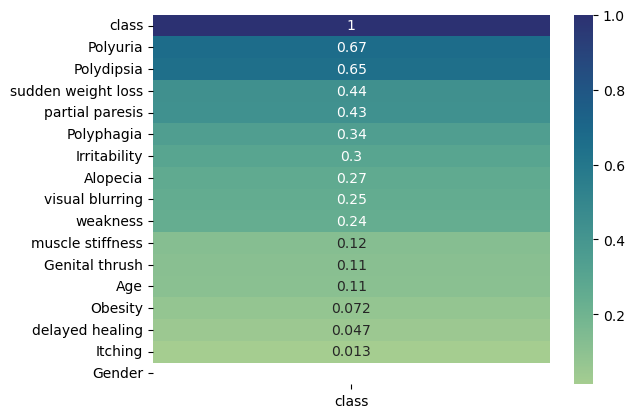

In [19]:
corr = df_numeric.corr()['class']
corr = corr.abs().sort_values(ascending=False)
sns.heatmap(data =corr.to_frame(), annot=True, cmap='crest')

In [20]:
threshold = .05
features_less_than_threshold = corr[abs(corr) < threshold].index
print(f"Dropping these features: {features_less_than_threshold}")
df_numeric.drop(features_less_than_threshold, inplace=True, axis=1)

Dropping these features: Index(['delayed healing', 'Itching'], dtype='object')


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop('class', axis=1), df_numeric['class'], test_size = .2)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(416, 14)
(104, 14)
(416,)
(104,)


# Random Forest Classifier

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Randomclass = RandomForestClassifier()
Randomclass.fit(X_train,y_train)
y_pred = Randomclass.predict(X_test)
score = accuracy_score(y_test, y_pred)
accuracy_d = {u'Random_Forest':score}
print("Accuracy of RandomForestClassifier : ",score)
print(classification_report(y_test, y_pred))

Accuracy of RandomForestClassifier :  0.9711538461538461
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.97      0.98        62

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



# Decision Tree Classifier

In [40]:
DTclass = DecisionTreeClassifier()
DTclass.fit(X_train,y_train)
y_pred = DTclass.predict(X_test)
score_dt = accuracy_score(y_test, y_pred)
accuracy_d.update({u'Decision_tree':score_dt})
print(classification_report(y_test, y_pred))
print("Accuracy of DecisionTreeClassifier : ",score_dt)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.95      0.96        62

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104

Accuracy of DecisionTreeClassifier :  0.9519230769230769


# Logistic Regression 

In [41]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
score_lr = accuracy_score(y_test, y_pred)
accuracy_d.update({u'Logistic_Regr':score_lr})
print("Accuracy of DecisionTreeClassifier : ",score_lr)
print(classification_report(y_test, y_pred))

Accuracy of DecisionTreeClassifier :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.90      0.84      0.87        62

    accuracy                           0.85       104
   macro avg       0.84      0.85      0.84       104
weighted avg       0.85      0.85      0.85       104



# KNN (K=1 & K=2)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors=1)
Knn_model.fit(X_train,y_train )
y_pred = Knn_model.predict(X_test)
score_knn = accuracy_score(y_test, y_pred)
accuracy_d.update({u'KNN':score_knn})
print("Accuracy of DecisionTreeClassifier : ",score_knn)
print(classification_report(y_test, y_pred))

Accuracy of DecisionTreeClassifier :  0.9423076923076923
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.95        62

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



In [36]:
Knn_model = KNeighborsClassifier(n_neighbors=3)
Knn_model.fit(X_train,y_train )
y_pred = Knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.98      0.89      0.93        62

    accuracy                           0.92       104
   macro avg       0.92      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



# Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
     
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
score_nb = accuracy_score(y_test, y_pred)
accuracy_d.update({u'Naive_Bayes':score_nb})
print("Accuracy of DecisionTreeClassifier : ",score_nb)
print(classification_report(y_test, y_pred))

Accuracy of DecisionTreeClassifier :  0.8365384615384616
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        42
           1       0.88      0.84      0.86        62

    accuracy                           0.84       104
   macro avg       0.83      0.84      0.83       104
weighted avg       0.84      0.84      0.84       104



# Accuracy of models

In [45]:
accuracy_d

{'Random_Forest': 0.9711538461538461,
 'Decision_tree': 0.9519230769230769,
 'Logistic_Regr': 0.8461538461538461,
 'KNN': 0.9423076923076923,
 'Naive_Bayes': 0.8365384615384616}

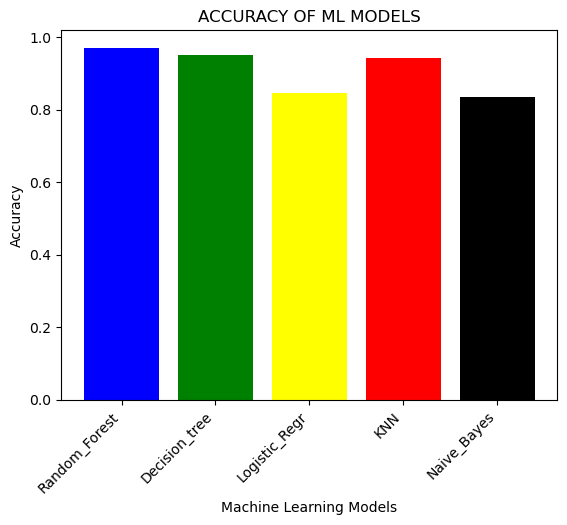

In [49]:
colour=['blue', 'green', 'yellow', 'red', 'black']
plt.bar(range(len(accuracy_d)), list(accuracy_d.values()), color=colour, align='center')
plt.xticks(range(len(accuracy_d)), list(accuracy_d.keys()))
plt.xticks(rotation=45, ha='right')
plt.title("ACCURACY OF ML MODELS")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")

plt.show()